In [1]:
#imorting libraries
!pip install mlxtend
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
my_movies= pd.read_csv("my_movies.csv")

In [3]:
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# EDA

In [4]:
my_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


# Pre-Processing

In [7]:
#Converting the data into dummy variables
movies=pd.get_dummies(my_movies)
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm 

In [10]:
frequent_itemsets = apriori(movies, min_support=0.1,use_colnames=True)

In [11]:
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P..."
1393,0.1,"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P..."
1394,0.1,"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P..."
1395,0.1,"(V2_LOTR1, V3_Harry Potter1, Green Mile, LOTR2..."


In [12]:
#appying the association_rule function on the frequent_itemsets and the minimum lift ratio we will keep it as 1
rules= association_rules(frequent_itemsets,metric="lift", min_threshold=1)

In [13]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(LOTR1),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64212,(V4_Green Mile),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64213,(V5_LOTR2),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64214,(V1_Sixth Sense),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [14]:
# A high conviction value means that the consequent is highly depending on the antecedent and range[0 inf]

In [15]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32108,"(V5_LOTR2, Harry Potter1, LOTR1, LOTR2)","(V3_Harry Potter1, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
52635,"(V5_LOTR2, Sixth Sense, Green Mile, LOTR2)","(V1_Sixth Sense, V2_LOTR1, LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33413,"(V5_LOTR2, Sixth Sense)","(V2_LOTR1, LOTR2, LOTR1, V4_Green Mile, Harry ...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33414,"(Sixth Sense, Harry Potter1)","(V2_LOTR1, LOTR2, LOTR1, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
52644,"(V5_LOTR2, Sixth Sense, LOTR1, LOTR2)","(V1_Sixth Sense, V2_LOTR1, Green Mile, V4_Gree...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33416,"(LOTR2, V4_Green Mile)","(V2_LOTR1, Sixth Sense, LOTR1, V5_LOTR2, Harry...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33417,"(V5_LOTR2, LOTR2)","(V2_LOTR1, Sixth Sense, LOTR1, V4_Green Mile, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33418,"(Harry Potter1, LOTR2)","(V2_LOTR1, Sixth Sense, LOTR1, V4_Green Mile, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33419,"(LOTR1, V4_Green Mile)","(V2_LOTR1, Sixth Sense, LOTR2, V5_LOTR2, Harry...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33420,"(V5_LOTR2, LOTR1)","(V2_LOTR1, Sixth Sense, LOTR2, V4_Green Mile, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [18]:
#the outout will display what are the values that >1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(LOTR1),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64212,(V4_Green Mile),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64213,(V5_LOTR2),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64214,(V1_Sixth Sense),"(V2_LOTR1, Sixth Sense, Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


# Visualization 

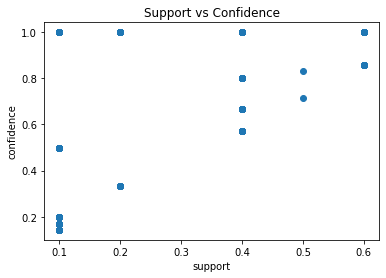

In [19]:
# visualization for rule
#here we are creating the scatter plot for support vs confidence
import matplotlib.pyplot as plt
plt.scatter(rules.support,rules.confidence )
plt.title("Support vs Confidence")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

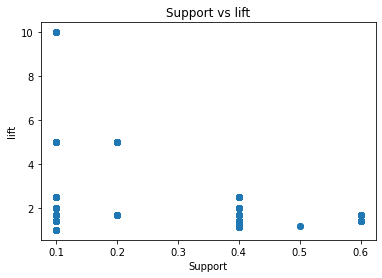

In [20]:
#here we are creating the scattter plot for support vs lift
plt.scatter(rules.support,rules.lift)
plt.title("Support vs lift")
plt.xlabel('Support')
plt.ylabel('lift')
plt.show()

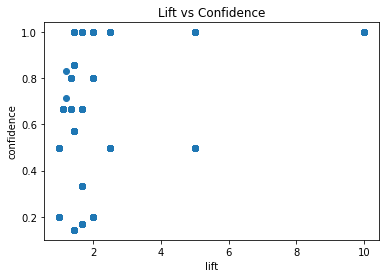

In [21]:
#here we are creating the scatter plot for lift vs confidence
plt.scatter(rules.lift,rules.confidence)
plt.title("Lift vs Confidence")
plt.xlabel("lift")
plt.ylabel("confidence")
plt.show()